In [72]:
import pandas as pd
import numpy as np

In [73]:
from warnings import filterwarnings
filterwarnings("ignore")

In [74]:
data=pd.read_csv('C:/Users/DELL/Desktop/veri bilimi kampı/Data/smartphones.csv')
df=data.copy()
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1333 non-null   float64
 4   Storage      1791 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RAM,1333.0,5.960990,2.668070,1.00,4.00,6.00,8.0000,12.00
Storage,1791.0,162.652150,139.411605,2.00,64.00,128.00,256.0000,1000.00
Final Price,1816.0,492.175573,398.606183,60.46,200.99,349.99,652.7175,2271.28


In [77]:
df.isnull().sum()

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [90]:
# RAM çift değer aldığı için mean yerine mod almamız gerekiyor
#mode bir liste haline getiriyor ilk değeri almak için ilk indisi alıyoruz

df['RAM'].fillna(df['RAM'].mode()[0], inplace=True)
df['Storage'].fillna(df['Storage'].mode()[0], inplace=True)

In [91]:
df.isnull().sum()

Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

In [92]:
df.drop(['Smartphone'],axis=1,inplace=True)

KeyError: "['Smartphone'] not found in axis"

In [93]:
df.head()

,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [94]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

In [96]:
for call in df.columns:
    if df[call].dtype == "object":
        df[call],labels = pd.factorize(df[call])

In [97]:
df

,Brand,Model,RAM,Storage,Color,Free,Final Price
0,0,0,8.0,256.0,0,0,231.60
1,1,1,4.0,128.0,1,0,279.00
2,2,2,4.0,128.0,1,0,179.01
3,3,3,6.0,128.0,2,0,279.99
4,4,4,12.0,512.0,3,0,799.00
...,...,...,...,...,...,...,...
1811,3,240,4.0,64.0,1,0,249.01
1812,3,223,4.0,128.0,1,0,200.00
1813,3,215,4.0,128.0,3,0,269.00
1814,3,370,4.0,64.0,2,0,211.00


In [89]:
lof = LocalOutlierFactor(n_neighbors=20) #skoru verirken etrafında ne kadar yakın veri var ona göre aykırı değer analizi yap

outlier_scores =lof.fit_predict(new_df)

np.where(outlier_scores == -1)[0] #aykırı değerler -1 ile gösterilir

ValueError: Input X contains NaN.
LocalOutlierFactor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [51]:
new_df.loc[np.where(outlier_scores == -1)[0]]

,RAM,Storage,Final Price
32,12.00000,512.00000,521.60
43,12.00000,512.00000,521.60
60,4.00000,128.00000,123.00
98,8.00000,128.00000,413.00
103,4.00000,128.00000,123.00
...,...,...,...
1753,5.96099,162.65215,144.99
1754,5.96099,162.65215,144.99
1780,5.96099,1000.00000,378.00
1781,5.96099,162.65215,224.00


In [52]:
len(np.where(outlier_scores == -1)[0]) /new_df.shape[0]*100

6.6629955947136565

In [53]:
outlier_indices = np.where(outlier_scores == -1)[0]

In [54]:
mean_values = new_df.mean()
for index in outlier_indices:
    new_df.loc[index] = mean_values

new_df.loc[np.where(outlier_scores == -1)[0]]

,RAM,Storage,Final Price
32,5.96099,162.65215,492.175573
43,5.96099,162.65215,492.175573
60,5.96099,162.65215,492.175573
98,5.96099,162.65215,492.175573
103,5.96099,162.65215,492.175573
...,...,...,...
1753,5.96099,162.65215,492.175573
1754,5.96099,162.65215,492.175573
1780,5.96099,162.65215,492.175573
1781,5.96099,162.65215,492.175573


In [55]:
df[['RAM', 'Storage', 'Final Price']] = new_df

In [56]:
df.head()

,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


In [57]:
df['Color'].unique()

array(['Yellow', 'Blue', 'Gray', 'White', 'Black', 'Green', 'Silver',
       'Gold', 'Brown', 'Orange', 'Purple', 'Pink', 'Red', 'Turquoise',
       'Rainbow', 'Bronze', 'Crystal'], dtype=object)

In [58]:
df['Color'] = pd.Categorical(df['Color'])
dfDummies = pd.get_dummies(df['Color'], prefix='Color', dtype='int')
dfDummies.head()

,Color_Black,Color_Blue,Color_Bronze,Color_Brown,Color_Crystal,Color_Gold,Color_Gray,Color_Green,Color_Orange,Color_Pink,Color_Purple,Color_Rainbow,Color_Red,Color_Silver,Color_Turquoise,Color_White,Color_Yellow
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [59]:
df = pd.concat([df, dfDummies], axis=1)
df.head()

,Brand,Model,RAM,Storage,Color,Free,Final Price,Color_Black,Color_Blue,Color_Bronze,...,Color_Green,Color_Orange,Color_Pink,Color_Purple,Color_Rainbow,Color_Red,Color_Silver,Color_Turquoise,Color_White,Color_Yellow
0,Realme,C55,8.0,256.0,Yellow,Yes,231.60,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Nothing,Phone (2),12.0,512.0,White,Yes,799.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(new_df)

scaled_df = pd.DataFrame(scaled_data, columns=new_df.columns)

scaled_df

,RAM,Storage,Final Price
0,0.903615,0.757001,-0.679680
1,-0.882217,-0.269503,-0.556964
2,-0.882217,-0.269503,-0.815833
3,0.010699,-0.269503,-0.554401
4,2.689447,2.810010,0.789290
...,...,...,...
1811,-0.882217,-0.782755,-0.634606
1812,-0.882217,-0.269503,-0.761491
1813,-0.882217,-0.269503,-0.582853
1814,-0.882217,-0.782755,-0.733013


In [61]:
df.head()

,Brand,Model,RAM,Storage,Color,Free,Final Price,Color_Black,Color_Blue,Color_Bronze,...,Color_Green,Color_Orange,Color_Pink,Color_Purple,Color_Rainbow,Color_Red,Color_Silver,Color_Turquoise,Color_White,Color_Yellow
0,Realme,C55,8.0,256.0,Yellow,Yes,231.60,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Nothing,Phone (2),12.0,512.0,White,Yes,799.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0


array([[<Axes: title={'center': 'RAM'}>,
        <Axes: title={'center': 'Storage'}>,
        <Axes: title={'center': 'Final Price'}>,
        <Axes: title={'center': 'Color_Black'}>],
       [<Axes: title={'center': 'Color_Blue'}>,
        <Axes: title={'center': 'Color_Bronze'}>,
        <Axes: title={'center': 'Color_Brown'}>,
        <Axes: title={'center': 'Color_Crystal'}>],
       [<Axes: title={'center': 'Color_Gold'}>,
        <Axes: title={'center': 'Color_Gray'}>,
        <Axes: title={'center': 'Color_Green'}>,
        <Axes: title={'center': 'Color_Orange'}>],
       [<Axes: title={'center': 'Color_Pink'}>,
        <Axes: title={'center': 'Color_Purple'}>,
        <Axes: title={'center': 'Color_Rainbow'}>,
        <Axes: title={'center': 'Color_Red'}>],
       [<Axes: title={'center': 'Color_Silver'}>,
        <Axes: title={'center': 'Color_Turquoise'}>,
        <Axes: title={'center': 'Color_White'}>,
        <Axes: title={'center': 'Color_Yellow'}>]], dtype=object)

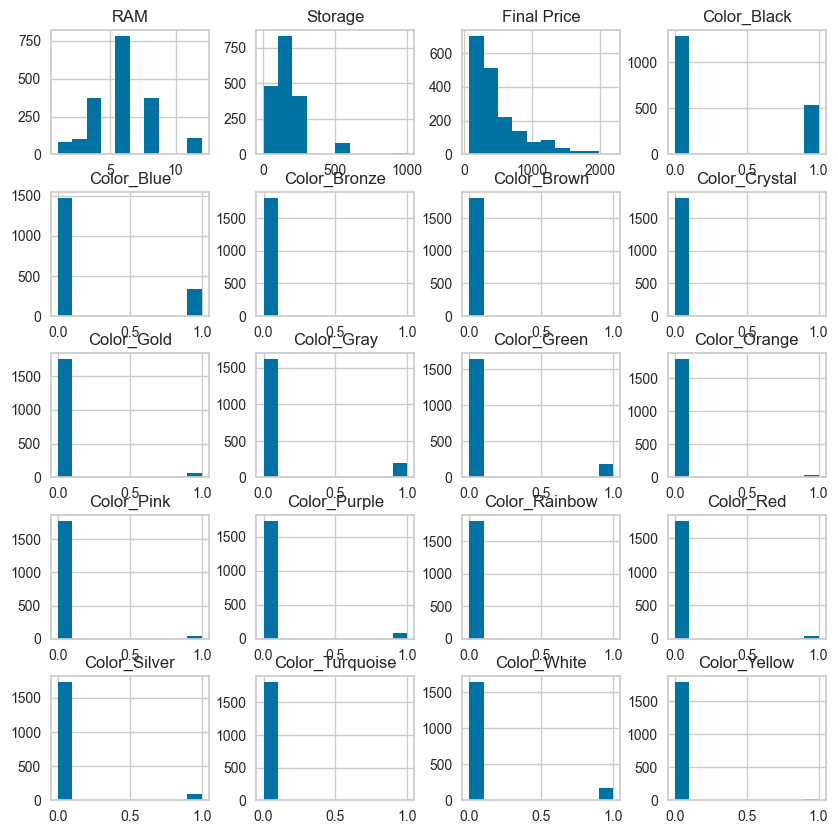

In [62]:
df.hist(figsize = (10,10))

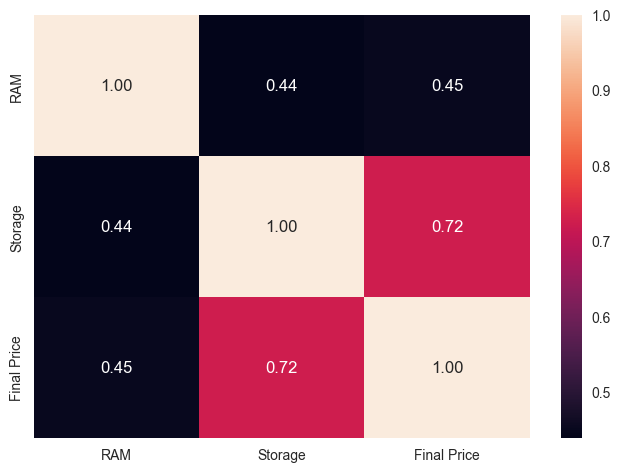

In [63]:
list1 = ['RAM','Storage','Final Price']
import seaborn as sns
sns.heatmap(df[list1].corr(),annot=True,fmt='.2f')
plt.show()

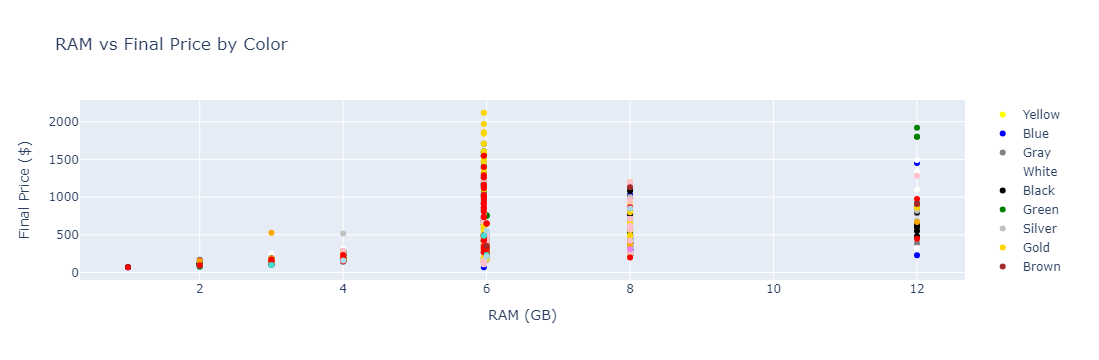

In [64]:
import plotly.graph_objects as go
from plotly.offline import iplot

# Veriyi renklere göre ayırma
df_Yellow = df[df.Color == 'Yellow'].iloc[:100, :]
df_Blue = df[df.Color == 'Blue'].iloc[:100, :]
df_Gray = df[df.Color == 'Gray'].iloc[:100, :]
df_White = df[df.Color == 'White'].iloc[:100, :]
df_Black = df[df.Color == 'Black'].iloc[:100, :]
df_Green = df[df.Color == 'Green'].iloc[:100, :]
df_Silver = df[df.Color == 'Silver'].iloc[:100, :]
df_Gold = df[df.Color == 'Gold'].iloc[:100, :]
df_Brown = df[df.Color == 'Brown'].iloc[:100, :]
df_Orange = df[df.Color == 'Orange'].iloc[:100, :]
df_Pink = df[df.Color == 'Pink'].iloc[:100, :]
df_Red = df[df.Color == 'Red'].iloc[:100, :]
df_Turquoise = df[df.Color == 'Turquoise'].iloc[:100, :]
df_Rainbow = df[df.Color == 'Rainbow'].iloc[:100, :]
df_Bronze = df[df.Color == 'Bronze'].iloc[:100, :]
df_Crystal = df[df.Color == 'Crystal'].iloc[:100, :]

# Scatter plot oluşturma
trace_Yellow = go.Scatter(
    x=df_Yellow['RAM'], y=df_Yellow['Final Price'], mode='markers', name="Yellow",
    marker=dict(color='yellow'), text=df_Yellow['Color']
)
trace_Blue = go.Scatter(
    x=df_Blue['RAM'], y=df_Blue['Final Price'], mode='markers', name="Blue",
    marker=dict(color='blue'), text=df_Blue['Color']
)
trace_Gray = go.Scatter(
    x=df_Gray['RAM'], y=df_Gray['Final Price'], mode='markers', name="Gray",
    marker=dict(color='gray'), text=df_Gray['Color']
)
trace_White = go.Scatter(
    x=df_White['RAM'], y=df_White['Final Price'], mode='markers', name="White",
    marker=dict(color='white'), text=df_White['Color']
)
trace_Black = go.Scatter(
    x=df_Black['RAM'], y=df_Black['Final Price'], mode='markers', name="Black",
    marker=dict(color='black'), text=df_Black['Color']
)
trace_Green = go.Scatter(
    x=df_Green['RAM'], y=df_Green['Final Price'], mode='markers', name="Green",
    marker=dict(color='green'), text=df_Green['Color']
)
trace_Silver = go.Scatter(
    x=df_Silver['RAM'], y=df_Silver['Final Price'], mode='markers', name="Silver",
    marker=dict(color='silver'), text=df_Silver['Color']
)
trace_Gold = go.Scatter(
    x=df_Gold['RAM'], y=df_Gold['Final Price'], mode='markers', name="Gold",
    marker=dict(color='gold'), text=df_Gold['Color']
)
trace_Brown = go.Scatter(
    x=df_Brown['RAM'], y=df_Brown['Final Price'], mode='markers', name="Brown",
    marker=dict(color='brown'), text=df_Brown['Color']
)
trace_Orange = go.Scatter(
    x=df_Orange['RAM'], y=df_Orange['Final Price'], mode='markers', name="Orange",
    marker=dict(color='orange'), text=df_Orange['Color']
)
trace_Pink = go.Scatter(
    x=df_Pink['RAM'], y=df_Pink['Final Price'], mode='markers', name="Pink",
    marker=dict(color='pink'), text=df_Pink['Color']
)
trace_Red = go.Scatter(
    x=df_Red['RAM'], y=df_Red['Final Price'], mode='markers', name="Red",
    marker=dict(color='red'), text=df_Red['Color']
)
trace_Turquoise = go.Scatter(
    x=df_Turquoise['RAM'], y=df_Turquoise['Final Price'], mode='markers', name="Turquoise",
    marker=dict(color='turquoise'), text=df_Turquoise['Color']
)
trace_Rainbow = go.Scatter(
    x=df_Rainbow['RAM'], y=df_Rainbow['Final Price'], mode='markers', name="Rainbow",
    marker=dict(color='violet'), text=df_Rainbow['Color']
)
trace_Bronze = go.Scatter(
    x=df_Bronze['RAM'], y=df_Bronze['Final Price'], mode='markers', name="Bronze",
    marker=dict(color='brown'), text=df_Bronze['Color']
)
trace_Crystal = go.Scatter(
    x=df_Crystal['RAM'], y=df_Crystal['Final Price'], mode='markers', name="Crystal",
    marker=dict(color='lightblue'), text=df_Crystal['Color']
)

data = [trace_Yellow, trace_Blue, trace_Gray, trace_White, trace_Black, trace_Green, trace_Silver, trace_Gold, trace_Brown, trace_Orange, trace_Pink, trace_Red, trace_Turquoise, trace_Rainbow, trace_Bronze, trace_Crystal]

layout = dict(
    title='RAM vs Final Price by Color',
    xaxis=dict(title='RAM (GB)', ticklen=5, zeroline=False),
    yaxis=dict(title='Final Price ($)', ticklen=5, zeroline=False)
)

fig = dict(data=data, layout=layout)
iplot(fig)


In [65]:
from sklearn.feature_selection import SelectKBest, f_regression

In [66]:
df.dropna(inplace=True)

In [67]:
df.isna()

,Brand,Model,RAM,Storage,Color,Free,Final Price,Color_Black,Color_Blue,Color_Bronze,...,Color_Green,Color_Orange,Color_Pink,Color_Purple,Color_Rainbow,Color_Red,Color_Silver,Color_Turquoise,Color_White,Color_Yellow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1812,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1813,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1814,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
!pip install kmeans

  Using cached kmeans-1.0.2.tar.gz (5.9 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build kmeans


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [24 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\kmeans
  copying kmeans\performance.py -> build\lib.win-amd64-cpython-312\kmeans
  copying kmeans\tests.py -> build\lib.win-amd64-cpython-312\kmeans
  copying kmeans\__init__.py -> build\lib.win-amd64-cpython-312\kmeans
  running egg_info
  writing kmeans.egg-info\PKG-INFO
  writing dependency_links to kmeans.egg-info\dependency_links.txt
  writing top-level names to kmeans.egg-info\top_level.txt
  reading manifest file 'kmeans.egg-info\SOURCES.txt'
  writing manifest file 'kmeans.egg-info\SOURCES.txt'
  copying kmeans\lib.c -> build\lib.win-amd64-cpython-312\kmeans
  running build_ext
  building 'kmeans/lib' extension
  creating build\temp.win-amd64-cpython-312
  creating build\temp.win-amd64-cpython-312\Release
  creating build\temp.win-amd64-cpy

In [37]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans,k=(2,50))
visualizer.fit(df)
visualizer.poof()

NameError: name 'KMeans' is not defined